<a href="https://colab.research.google.com/github/adilakshmivadavalli/Experience/blob/master/nn_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import pandas
import math
import matplotlib.pyplot as plt

In [ ]:
Data = pandas.read_csv(r"/content/sample_data/data_banknote_authentication.csv")
Data = Data.to_numpy()

In [ ]:
m, n = Data.shape
n0 = n - 1

In [ ]:
randseq = np.random.permutation(m)
Data = Data[randseq[0:m], 0:n]

In [ ]:
train_num = math.floor(m*0.8)
test_num = m - train_num

In [ ]:
x_train = torch.tensor(Data[:train_num, :n0], dtype=torch.float32)
y_train = torch.tensor(Data[:train_num, n0], dtype=torch.float32).unsqueeze(1)

x_test = torch.tensor(Data[train_num:, :n0], dtype=torch.float32)
y_test = torch.tensor(Data[train_num:, n0], dtype=torch.float32).unsqueeze(1)

In [ ]:
class TabularNN(nn.Module):
    def __init__(self):
        super(TabularNN, self).__init__()
        # Define layers in __init__
        self.fc1 = nn.Linear(4, 5)
        self.fc2 = nn.Linear(5, 5)
        self.fc3 = nn.Linear(5, 1)

    def forward(self, x):
        # First hidden layer: Apply linear transformation, then apply activation
        x = self.fc1(x)
        x = torch.sigmoid(x)

        # Second hidden layer: Apply linear transformation, then apply activation
        x = self.fc2(x)
        x = torch.sigmoid(x)

        # Output layer: Apply linear transformation, then apply activation
        x = self.fc3(x)
        x = torch.sigmoid(x)

        return x

In [ ]:
# Initialize the model, loss function, and optimizer
model = TabularNN()
criterion = nn.BCELoss()  # Binary cross entropy for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Training loop
epochs = 200

train_loss = np.zeros((epochs,1))
train_accuracy = np.zeros((epochs,1))

for epoch in range(epochs):
    # Forward pass
    y_pred = model(x_train)

    # Metrics computation
    pred_train = (y_pred > 0.5).float()
    train_accuracy[epoch] = 1 - torch.sum(abs(pred_train - y_train))/train_num

    # Compute the loss
    loss = criterion(y_pred, y_train)

    train_loss[epoch] = loss.item()

    print(f'Epoch: {epoch+1}, Loss: {train_loss[epoch]}, Accuracy: {train_accuracy[epoch]}')

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



/tmp/ipython-input-3649151082.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  train_accuracy[epoch] = 1 - torch.sum(abs(pred_train - y_train))/train_num


Epoch: 1, Loss: [0.69212025], Accuracy: [0.55150414]
Epoch: 2, Loss: [0.69042981], Accuracy: [0.55150414]
Epoch: 3, Loss: [0.68911159], Accuracy: [0.55150414]
Epoch: 4, Loss: [0.68814385], Accuracy: [0.55150414]
Epoch: 5, Loss: [0.68745005], Accuracy: [0.55150414]
Epoch: 6, Loss: [0.68689841], Accuracy: [0.55150414]
Epoch: 7, Loss: [0.68635446], Accuracy: [0.55150414]
Epoch: 8, Loss: [0.68573982], Accuracy: [0.55150414]
Epoch: 9, Loss: [0.68504089], Accuracy: [0.55150414]
Epoch: 10, Loss: [0.68428165], Accuracy: [0.55150414]
Epoch: 11, Loss: [0.683496], Accuracy: [0.55150414]
Epoch: 12, Loss: [0.68270755], Accuracy: [0.55150414]
Epoch: 13, Loss: [0.68192053], Accuracy: [0.55150414]
Epoch: 14, Loss: [0.68111986], Accuracy: [0.55150414]
Epoch: 15, Loss: [0.68028009], Accuracy: [0.55150414]
Epoch: 16, Loss: [0.67937434], Accuracy: [0.55150414]
Epoch: 17, Loss: [0.67837948], Accuracy: [0.55150414]
Epoch: 18, Loss: [0.67727894], Accuracy: [0.55150414]
Epoch: 19, Loss: [0.67606211], Accuracy

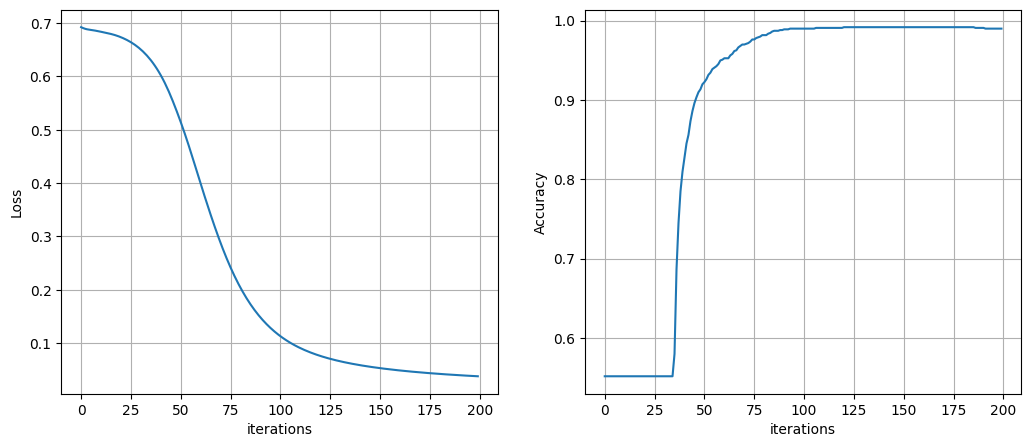

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracy)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Accuracy')

plt.subplots_adjust(left=0,
                    bottom=0.1,
                    right=1.5,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.2)

plt.show()

In [ ]:
# Testing the model
y_test_pred = model(x_test)

# Metrics computation
pred_test = (y_test_pred > 0.5).float()
test_accuracy = 1 - torch.sum(abs(y_test_pred - y_test))/test_num

print(test_accuracy.item())

0.9674057364463806
